In [3]:
from shapely.geometry import Point, GeometryCollection, MultiPolygon, Polygon
from model.RegionsCalcs import create_regions
from model.RegionsPlotter import standard_plot
import numpy as np
from model.NetworkGraph import CompleteGraph
from model.NodeClass import Node
from model.LinkClass import Link
from model.NetworkGraphPlots import NodeDegreeHeatMapPlot
from numpy import random
import matplotlib.pyplot as plt
from tecno_analysis.dimensioning_algorithm_tecnoechonomics import DimensioningAlgorithmTecnoeconomics

In [4]:
# Import the network
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [5]:
num_nodes = len(graph.nodes)
tentative_nodes_for_femtocells = np.zeros(num_nodes, dtype=int)

pick_prob = 0.5
for i, node in enumerate(graph.nodes):
    if node.type == "HL5" and random.random() < pick_prob:
        tentative_nodes_for_femtocells[i] = 1
        
tentative_range_for_femtocells = np.ones(num_nodes)
base_area = graph.network_polygon_bounds
node_power = np.array([0.1 if node.type == "HL5" else 40 for node in graph.nodes])


In [6]:
node_adjacencies_matrix = np.array(graph.adjacency_matrix)
node_positions = np.array([node.pos for node in graph.nodes])
node_type_hl4 = np.array([1 if node.type == "HL4" else 0 for node in graph.nodes])
node_type_hl5 = np.array([1 if node.type == "HL5" else 0 for node in graph.nodes])
traffic_injection = np.array([node.estimated_traffic_injection for node in graph.nodes])
fixed_nodes_for_hpld = node_type_hl4.copy()
tentative_nodes_for_hpld = np.zeros(num_nodes, dtype=int)
tentative_nodes_for_femtocells = node_type_hl5.copy()
tentative_range_for_femtocells = np.ones(num_nodes)
nodes_for_macrocells = node_type_hl4.copy()
range_for_macrocells = np.ones(num_nodes)
alpha_loss = 3
max_runtime_seconds = 180.0
euclidean_to_km_scale = 1.0
power_for_hpld = np.ones(num_nodes) * 5
power_for_femtocells = np.ones(num_nodes) * 0.1
power_for_macrocells = np.ones(num_nodes) * 40
alpha = 0.31
base_area = graph.network_polygon_bounds



In [7]:
algorithm = DimensioningAlgorithmTecnoeconomics(
    node_adjacencies_matrix=node_adjacencies_matrix,
    node_positions=node_positions,
    node_type_hl4=node_type_hl4,
    node_type_hl5=node_type_hl5,
    node_traffic_injection=traffic_injection,
    fixed_nodes_for_hpld=fixed_nodes_for_hpld,
    tentative_nodes_for_hpld=tentative_nodes_for_hpld,
    tentative_nodes_for_femtocells=tentative_nodes_for_femtocells,
    tentative_range_for_femtocells=tentative_range_for_femtocells,
    nodes_for_macrocells=nodes_for_macrocells,
    range_for_macrocells=range_for_macrocells,
    alpha_loss=alpha_loss,
    max_runtime_seconds=max_runtime_seconds,
    euclidean_to_km_scale=euclidean_to_km_scale,
    power_for_hpld=power_for_hpld,
    power_for_femtocells=power_for_femtocells,
    power_for_macrocells=power_for_macrocells,
    base_area=base_area,
    alpha=alpha,
)

In [8]:
nodes_with_hpld, nodes_with_femtocells, hpld_to_femtocell_association, heuristic_1_evolution, heuristic_2_evolution = algorithm.run_algorithm(max_runtime_seconds=max_runtime_seconds)

In [9]:
print(f'Shape of nodes_with_hpld: {nodes_with_hpld.shape}')
print(f'Number of HPLDs: {np.sum(nodes_with_hpld)}')
print(f'Shape of nodes_with_femtocells: {nodes_with_femtocells.shape}')
print(f'Number of femtocells: {np.sum(nodes_with_femtocells)}')
print(f'Shape of hpld_to_femtocell_association: {hpld_to_femtocell_association.shape}')
print(f'Shape of heuristic_1_evolution: {len(heuristic_1_evolution)}')
print(f'Final cost of heuristic_1: {heuristic_1_evolution[-1][1]}')
print(f'Shape of heuristic_2_evolution: {len(heuristic_2_evolution)}')

Shape of nodes_with_hpld: (154,)
Number of HPLDs: 20
Shape of nodes_with_femtocells: (154,)
Number of femtocells: 100
Shape of hpld_to_femtocell_association: (154, 154)
Shape of heuristic_1_evolution: 1029
Final cost of heuristic_1: 52.748808678285116
Shape of heuristic_2_evolution: 0


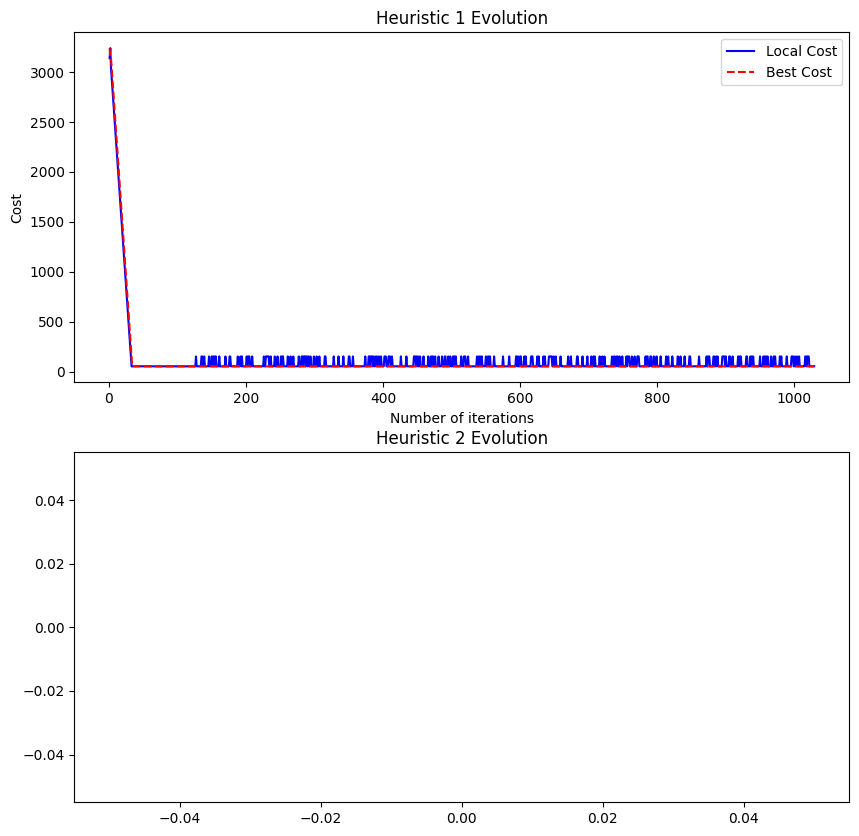

In [10]:
# Printing evolution of the heuristics
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Heuristic 1
# (iteration, cost, best cost, time)
iters = [x[0] for x in heuristic_1_evolution]
costs = [x[1] for x in heuristic_1_evolution]
best_costs = [x[2] for x in heuristic_1_evolution]
times = [x[3] for x in heuristic_1_evolution]


axs[0].plot(iters, costs, label='Local Cost', color='blue', linestyle='-')
axs[0].plot(iters, best_costs, label='Best Cost', color='red', linestyle='--')
axs[0].set_title('Heuristic 1 Evolution')
axs[0].set_xlabel('Number of iterations')
axs[0].set_ylabel('Cost')
axs[0].legend()

# Heuristic 2
# (time, cost, num_iterations)
iters = [x[2] for x in heuristic_2_evolution]
axs[1].plot(heuristic_2_evolution)
axs[1].set_title('Heuristic 2 Evolution')
plt.show()



In [11]:
nodes_with_hpld

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
nodes_with_femtocells

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
hpld_to_femtocell_association

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
node_positions

array([[10.81368257, 33.57836559],
       [16.69026513, 17.61496551],
       [24.85323932, 14.36374894],
       [12.00012644, 10.42867577],
       [22.4564953 , 16.6990066 ],
       [14.99625026, 13.39637459],
       [22.65222109, 22.53048249],
       [17.74017233, 10.05124959],
       [25.51098711, 21.78986516],
       [23.97340452, 18.51306172],
       [27.88509478, 22.19212142],
       [ 9.68725445,  7.17274948],
       [20.10155215, 15.65904674],
       [ 7.40983853, 10.96059539],
       [30.26365018, 15.86387668],
       [18.31915707, 13.10675426],
       [ 3.48321752, 26.51314547],
       [17.22890691, 21.82360317],
       [18.57220737,  4.41188527],
       [20.1352073 , 14.51723008],
       [19.19749114, 16.80840664],
       [ 3.62286201, 15.51776993],
       [15.6841772 , 23.83609916],
       [ 4.32823348, 12.68257803],
       [10.44467001,  8.25684298],
       [20.39782648, 23.55398832],
       [22.79541761, 28.03102833],
       [14.10677013, 18.15691877],
       [11.97724091,

In [14]:
tentative_nodes_for_femtocells

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
tentative_range_for_femtocells

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [16]:
traffic_injection

array([ 250, 1000,  500,  500, 1000, 1000, 1000,  500,  500, 1000,  500,
        250, 1000,  250,  250, 1000,  250, 1000,  250, 1000, 1000,  250,
        500,  250,  250, 1000,  500, 1000,  500,  500,  500,  500,  250,
        250,  250,  250,  250, 1000,  500,  500, 1000,  500,  250,  250,
       1000, 1000, 1000, 1000,  500,  500, 1000, 1000, 1000, 1000,  500,
        500, 1000,  500, 1000,  500,  250, 1000,  250,  500,  250,  500,
        500,  250, 1000,  500,  250,  250,  500,  500,  500, 1000,  500,
       1000, 1000,  500,  500, 1000,  500,  500, 1000,  500,  250,  500,
        500, 1000, 1000, 1000, 1000, 1000,  500,  500, 1000, 1000,  500,
        250,  250,  250, 1000,  250,  250,  250,  250,  250,  250, 1000,
        250,  250,  250, 1000,  250, 1000,  500,  500,  250,  500, 1000,
        500,  250,  500,  250,  250,  500, 1000,  250,  250,  500,  250,
        250,  250,  500,  250, 1000,  250,  500,  250,  250,  250, 1000,
       1000,  250,  500, 1000,  500,  250,  250,  2

In [17]:
node_power

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1, 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
       40. , 40. , 40. , 40. , 40. , 40. , 40. , 40

# Plot the femtocells

# TODO

In [21]:
# Common scenario for both cases
# Params
p_tx_fem = 10       # W

femotcells = [
    [node_positions[node][0], node_positions[node][1], 0.1] for node in range(num_nodes) if nodes_with_femtocells[node] == 1
]

In [22]:

regions, _unsold = create_regions(
    np.array(femotcells),
    alpha_loss, 
    polygon_bounds=base_area,
)

In [23]:
regions

{99: <POLYGON ((7.394 18.329, 7.389 18.231, 7.389 18.231, 7.375 18.134, 7.375 18....>,
 98: <POLYGON ((4.512 15.086, 4.53 15.073, 4.53 15.073, 4.603 15.007, 4.603 15.00...>,
 97: <POLYGON ((13.048 22.894, 13.06 22.889, 13.694 22.096, 13.7 22.054, 13.7 22....>,
 96: <POLYGON ((6.235 27.54, 6.233 27.529, 6.233 27.529, 6.21 27.434, 6.21 27.434...>,
 95: <POLYGON ((11.555 14.475, 11.587 14.385, 11.587 14.385, 11.611 14.29, 11.611...>,
 94: <POLYGON ((15.64 30.652, 15.589 30.606, 15.589 30.606, 15.51 30.548, 15.51 3...>,
 93: <POLYGON ((11.848 17.805, 11.851 17.82, 11.851 17.82, 11.874 17.915, 11.874 ...>,
 92: <POLYGON ((25.963 22.137, 25.963 22.137, 25.963 22.137, 25.963 22.137, 25.96...>,
 91: <POLYGON ((18.764 16.744, 18.764 16.744, 18.764 16.744, 18.764 16.744, 18.76...>,
 90: <POLYGON ((26.765 25.7, 26.76 25.602, 26.76 25.602, 26.746 25.505, 26.746 25...>,
 89: <POLYGON ((11.339 25.252, 11.334 25.154, 11.334 25.154, 11.32 25.057, 11.32 ...>,
 88: <POLYGON ((21.581 16.576, 21.581 16.57

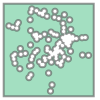

In [24]:
_unsold

In [25]:
area = Polygon(base_area)
print(f'Complete region area:{area.area}')
print(f'Uncovered area:{_unsold.area}')
print(f'Covered area:{area.area - _unsold.area} ({(area.area - _unsold.area) / area.area * 100:.2f}%)')

Complete region area:1230.7650240111575
Uncovered area:980.4897494390846
Covered area:250.27527457207293 (20.33%)


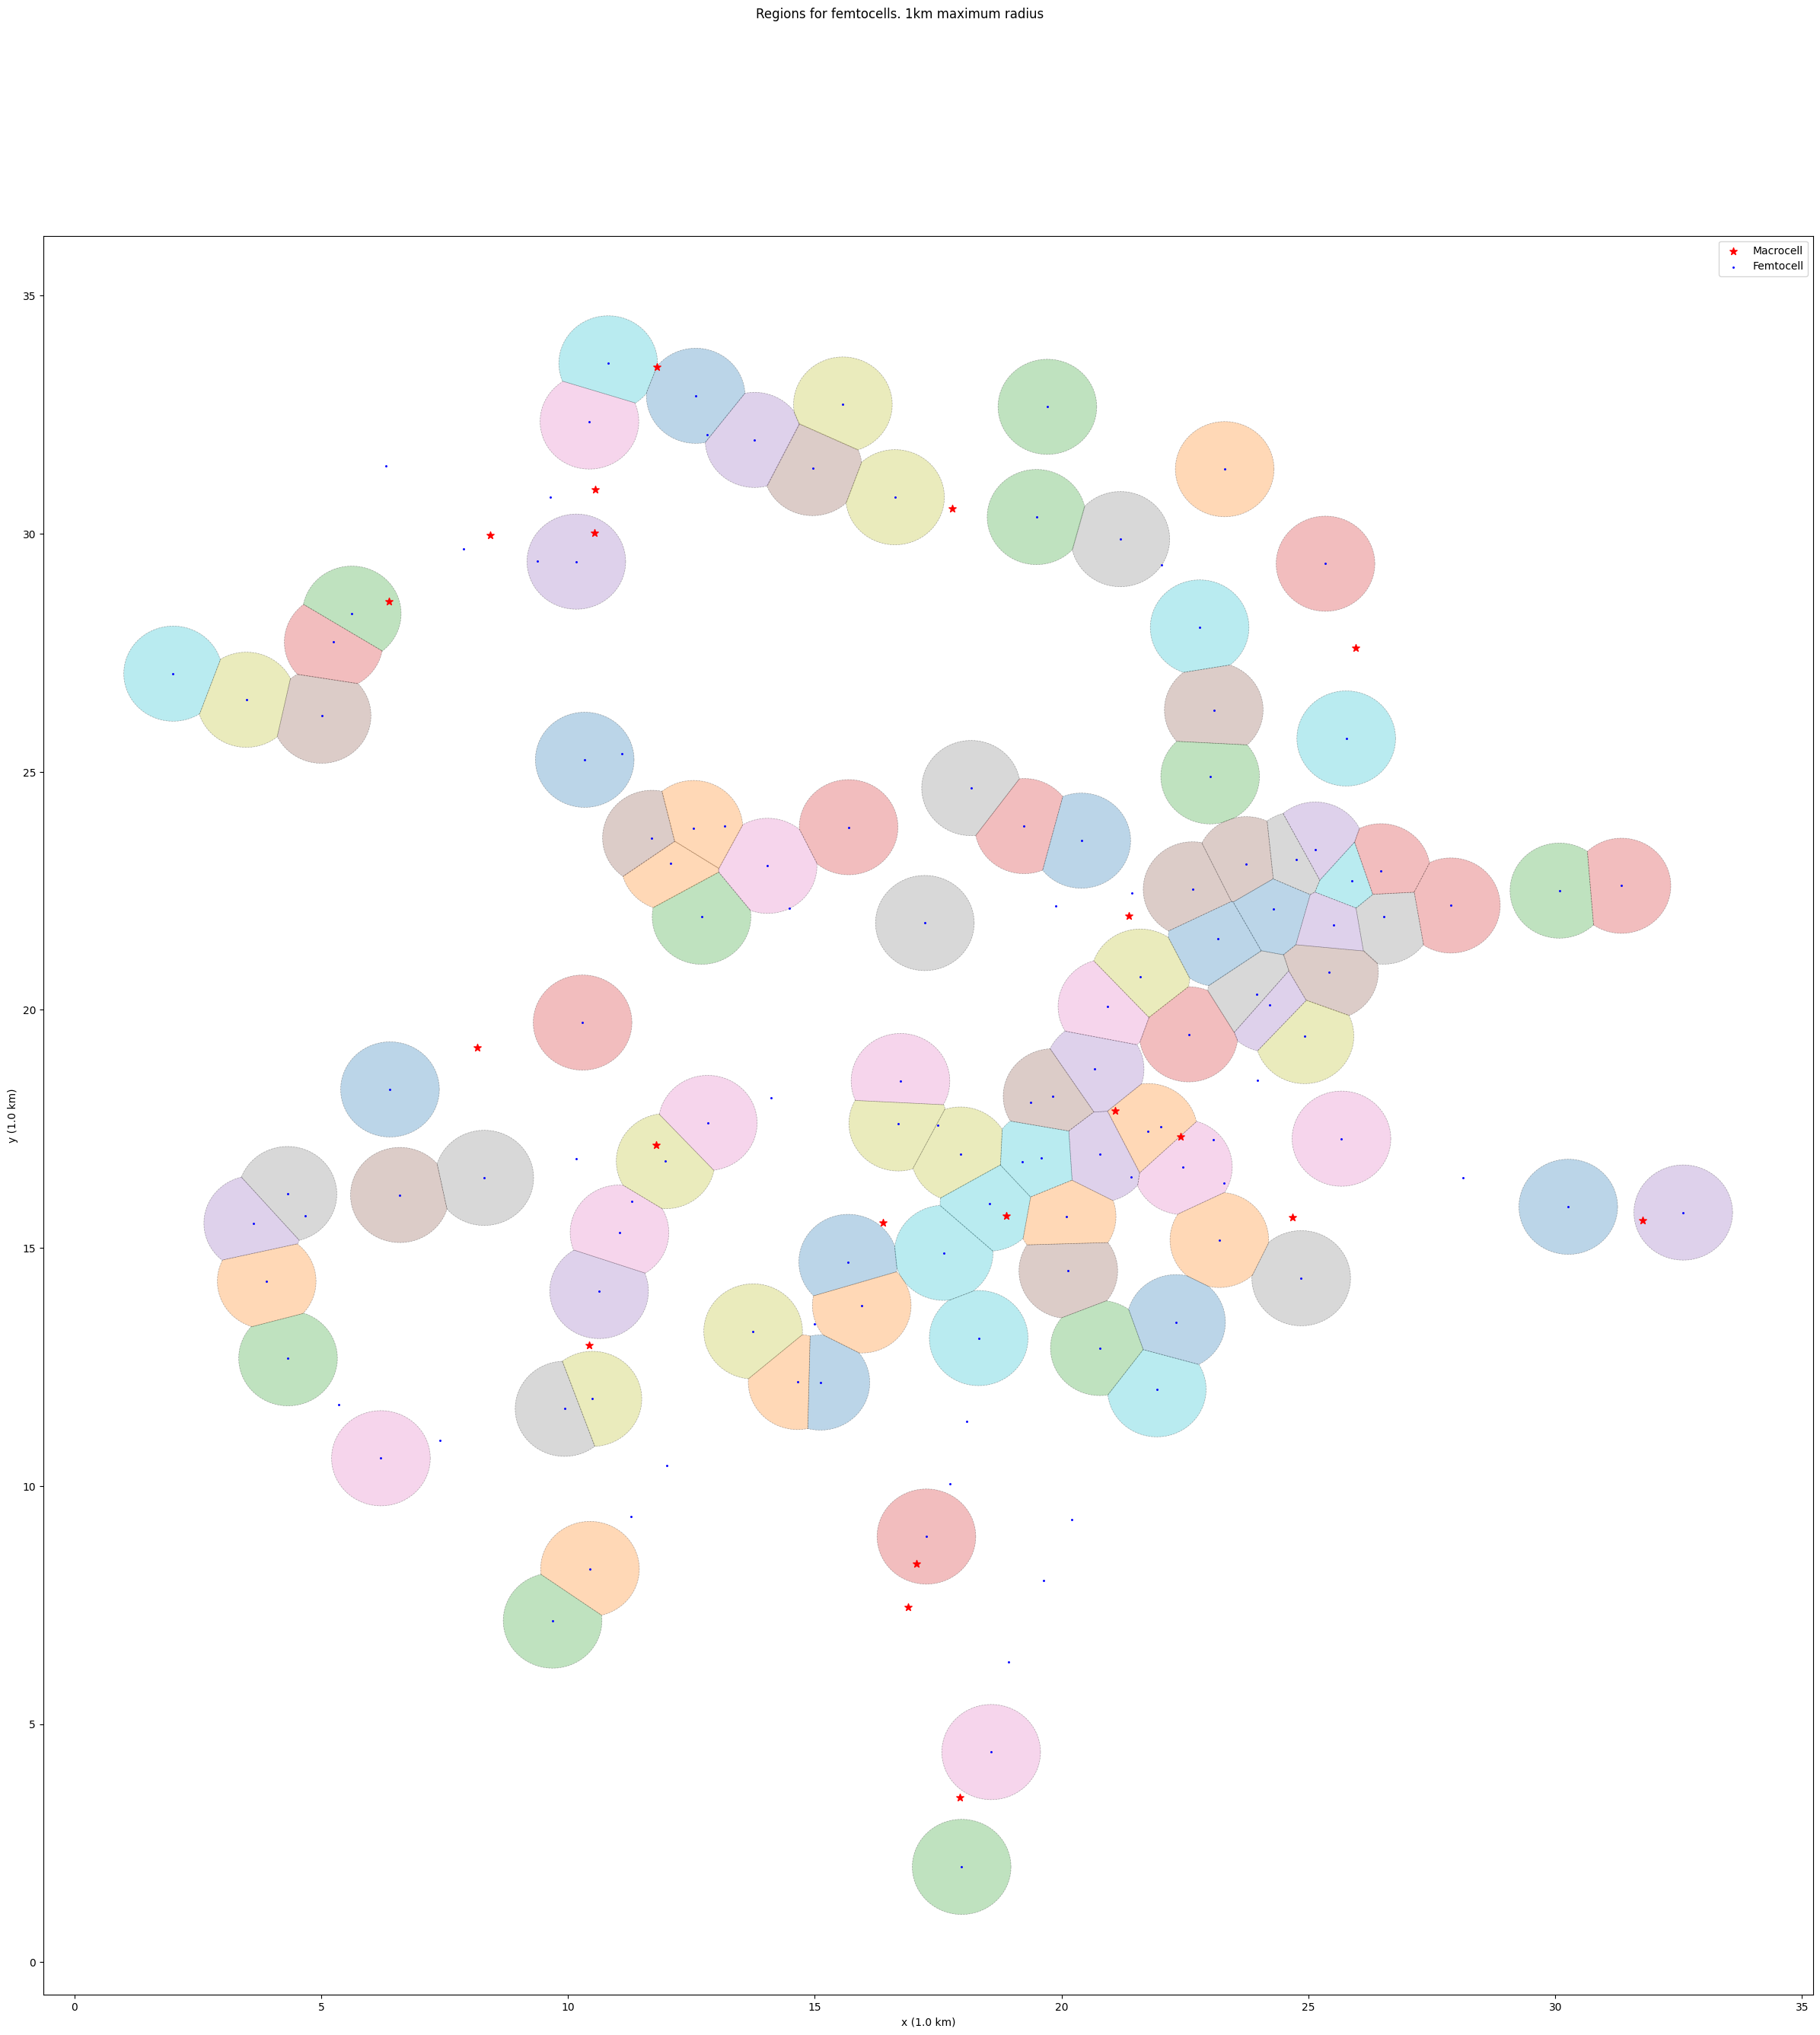

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: xlabel='x (1.0 km)', ylabel='y (1.0 km)'>)

In [26]:
standard_plot(
    regions, 
    graph.nodes, 
    1.0, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for femtocells. 1km maximum radius", "figsize": (30, 30)},
)